## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_merge_df
# Display the data table for preview
mouse_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_num = mouse_merge_df["Mouse ID"].count()
mouse_num

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_row = mouse_merge_df[mouse_merge_df.duplicated(['Mouse ID', 'Timepoint'])]
print(dup_row)


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# see above

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_merge_df.drop_duplicates((['Mouse ID', 'Timepoint']))
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_num2 = mouse_df["Mouse ID"].count()
mouse_num2

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mous_group_df = mouse_df.groupby(["Drug Regimen"])

mous_group_mean = mous_group_df["Tumor Volume (mm3)"].mean()
mous_group_median = mous_group_df["Tumor Volume (mm3)"].median()
mous_group_var = mous_group_df["Tumor Volume (mm3)"].var()
mous_group_std = mous_group_df["Tumor Volume (mm3)"].std()
mous_group_sem = mous_group_df["Tumor Volume (mm3)"].sem()

mous_group_sum = pd.DataFrame({"Mean": mous_group_mean,
                                 "Median":mous_group_median, 
                                 "Variance":mous_group_var, 
                                 "Standard Deviation": mous_group_std,
                                  "SEM": mous_group_sem})
mous_group_sum



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [135]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

mouse_gb = mouse_df.groupby("Drug Regimen")
mouse_gb['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

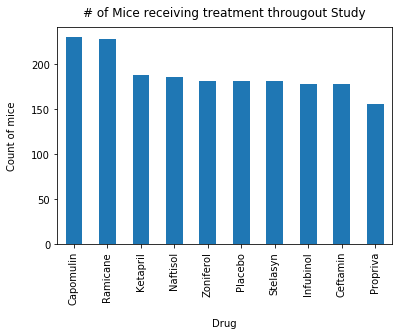

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#How many mice per Drug Regimen
panda_drug = mouse_df['Drug Regimen'].value_counts()
mouse_df['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel("Drug", labelpad=14)
plt.ylabel("Count of mice", labelpad=14)
plt.title("# of Mice receiving treatment througout Study", y=1.02);

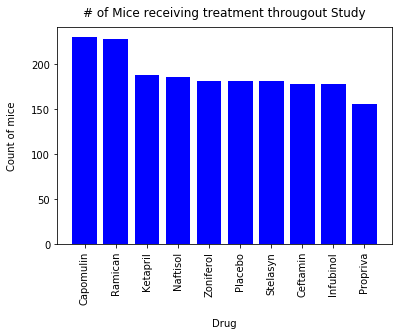

In [137]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_name = ["Capomulin", "Ramican", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
x_axis = np.arange(len(panda_drug))
plt.bar(x_axis, panda_drug, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_name)
plt.xticks(rotation = 90)
plt.xlabel("Drug", labelpad=14)
plt.ylabel("Count of mice", labelpad=14)
plt.title("# of Mice receiving treatment througout Study", y=1.02);

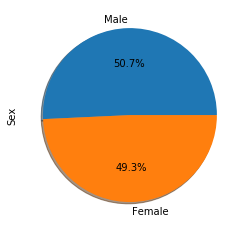

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

panda_drug = mouse_df['Sex'].value_counts()
mouse_df['Sex'].value_counts().plot(kind='pie', y = 'Male mice vs. Female Mice', shadow = True, autopct = '%1.1f%%')


(-1.1755066326598, 1.129125891541729, -1.1922583615934077, 1.1262834831032693)

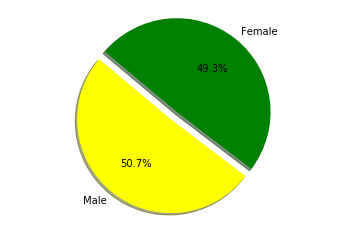

In [11]:
pies = mouse_df['Sex'].value_counts()
pie_label = ['Male', 'Female']
colors = ["yellow","green"]
explode = (0.1,0)
plt.pie(pies, explode=explode, labels=pie_label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_qob = mouse_df.groupby("Mouse ID")
mouse_qob2 = mouse_qob['Timepoint'].max()
mouse_qob2


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [13]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_qob3 = pd.merge(mouse_qob2, mouse_df, how= 'inner',  on=[ 'Mouse ID','Timepoint'])
mouse_qob3.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  # Locate the rows which contain mice on each drug and get the tumor volumes
  # add subset 
  # Determine outliers using upper and lower bounds
drug_selec = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
mouse_qob_fil = mouse_qob3[mouse_qob3["Drug Regimen"].isin(drug_selec)]
mouse_qob_fil

quartiles = mouse_qob_fil['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The the median of Tumor Volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [114]:
mouse_qob_fil

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


Text(0, 0.5, 'Tumor Volume (mm3)')

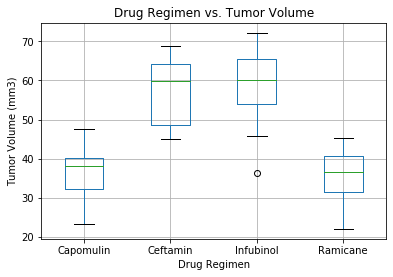

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_bp2 = mouse_qob_fil.boxplot(by = 'Drug Regimen', column = ['Tumor Volume (mm3)'], grid = True)
plt.title("Drug Regimen vs. Tumor Volume")
plt.suptitle("")
plt.ylabel("Tumor Volume (mm3)")

## Line and Scatter Plots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


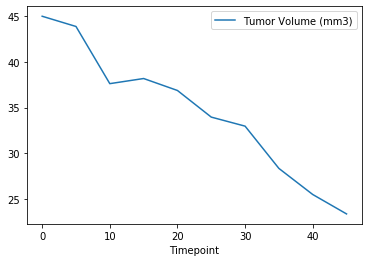

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
drug_selec2 = ['Capomulin']
mous_fil = ['s185']
mouse_qob_fil2 = mouse_df[mouse_df["Drug Regimen"].isin(drug_selec2)]
mouse_qob_fil3 = mouse_qob_fil2[mouse_qob_fil2["Mouse ID"].isin(mous_fil)]
drug_lp = mouse_qob_fil3.plot.line(x='Timepoint', y= 'Tumor Volume (mm3)')

mouse_qob_fil3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


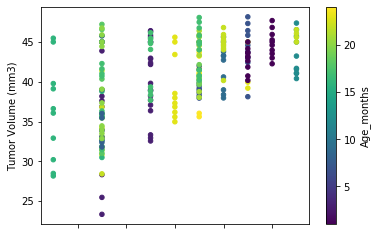

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
drug_sp = mouse_qob_fil2.plot.scatter( x= 'Weight (g)', y='Tumor Volume (mm3)', c='Age_months',colormap='viridis')
mouse_qob_fil2


## Correlation and Regression

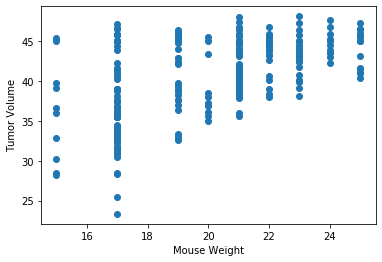

The correlation between both factors is 0.53


In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(mouse_qob_fil2.iloc[:,4],mouse_qob_fil2.iloc[:,6])
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()
cor_weight = mouse_qob_fil2.iloc[:,4]
cor_tum_vol = mouse_qob_fil2.iloc[:,6]
correlation = st.pearsonr(cor_weight, cor_tum_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

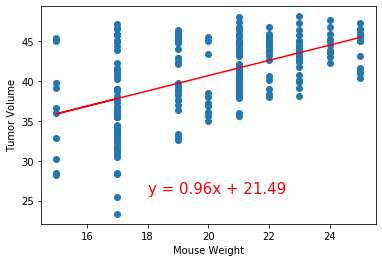

The r-squared is: 0.2763600223455911
y = 0.96x + 21.49


In [28]:
x_values = mouse_qob_fil2.iloc[:,4]
y_values = mouse_qob_fil2.iloc[:,6]
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,26),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)